# Importing Libraries

In [9]:
import pandas as pd
import numpy as np


# Load the Data

In [10]:
df=pd.read_csv(r"Country-data.csv")

In [11]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Inspecting the Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
df.describe(percentiles=[0.7,0.8,0.9,0.98,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
70%,50.000000,49.720000,8.044000,55.140000,19540.000000,8.964000,76.400000,3.340000,11920.000000
80%,66.320000,54.940000,9.118000,61.680000,29420.000000,12.500000,78.200000,4.592000,21020.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
98%,145.160000,100.056000,11.900000,105.760000,74208.000000,25.988000,82.000000,6.450400,66364.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [14]:
df.describe(percentiles=[0.01,0.02,0.05,0.1,0.2])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
2%,3.000000,9.131200,2.472800,15.864000,837.680000,-1.288240,52.352000,1.282800,364.320000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
20%,6.320000,22.120000,4.486000,28.020000,2548.000000,1.408000,61.880000,1.630000,1146.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000


# Outlier Treatment

In [15]:
df["exports"]=np.where(df["exports"]<3.909400,3.909400,df["exports"])
df["inflation"]=np.where(df["inflation"]>41.478,41.478,df["inflation"])

# Visualization 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

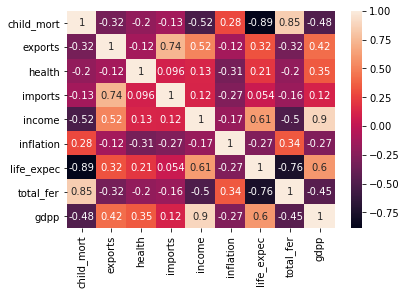

In [17]:
sns.heatmap(df.corr(),annot=True)

# Data Preparation

In [18]:
df[df["country"]=="United States"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


In [19]:
df[df["country"]=="Bhutan"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
18,Bhutan,42.7,42.5,5.2,70.7,6420,5.99,72.1,2.38,2180


In [20]:
12.4*48400

600160.0

In [21]:
42.5*2180

92650.0

In [22]:
df["imports"]=df["imports"]*df["gdpp"]/100
df["exports"]=df["exports"]*df["gdpp"]/100
df["health"]=df["health"]*df["gdpp"]/100

In [23]:
df1=df.drop(["country"],axis=1) #For applying in hopkins statistics "Hopkins doesn't accept string values"

# Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df1_scaled=mn.fit_transform(df1)

# Model Building

In [25]:
from sklearn.neighbors import NearestNeighbors

# Hopkins Statistics

In [26]:
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
hopkins(df1)

0.9784702177192702

# Clustering can be Applied as HS > 0.7

# Finding optimal value of clusters

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
from sklearn.cluster import KMeans

# Silhoutee Score

In [30]:
ss=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1_scaled)
    ss.append([k,silhouette_score(df1_scaled,kmeans.labels_)])

In [31]:
ss=pd.DataFrame(ss)

In [32]:
ss.columns=["Number of Clusters","Silhouette Score"]

In [33]:
ss

,Number of Clusters,Silhouette Score
0,2,0.374026
1,3,0.433187
2,4,0.406673
3,5,0.313546
4,6,0.307550
5,7,0.300672
6,8,0.307356
7,9,0.309987


Text(0, 0.5, 'Silhouette Score')

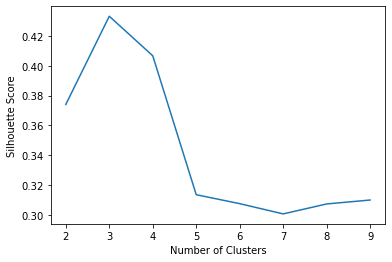

In [34]:
plt.plot(ss["Number of Clusters"],ss["Silhouette Score"])
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

# Ideal value of Cluster is 3 as SS is maximum

# Elbow Method

In [35]:
ssd=[]
for k in range(2,35):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df1_scaled)
    ssd.append([k,kmeans.inertia_])

In [36]:
ssd=pd.DataFrame(ssd)
ssd.columns=["Number of Clusters","SSD (Error)"]

In [37]:
ssd

,Number of Clusters,SSD (Error)
0,2,27.269326
1,3,16.569505
2,4,14.295703
3,5,12.438374
4,6,11.084594
5,7,9.733876
6,8,8.434092
7,9,7.869692
8,10,6.852027
9,11,6.379237


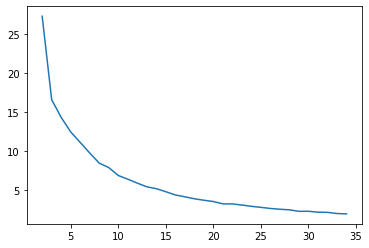

In [38]:
plt.plot(ssd["Number of Clusters"],ssd["SSD (Error)"])

# Optimal Number of Clusters 20

# Train the Final Model

In [47]:
kmeans_final=KMeans(n_clusters=3,max_iter=100)
kmeans_final.fit(df1_scaled)

KMeans(max_iter=100, n_clusters=3)

In [48]:
out=kmeans_final.predict(df1_scaled)

In [49]:
df["Cluster1"]= kmeans_final.labels_

In [50]:
df["Cluster"]= out

In [51]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster1,Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,2,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,2,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.620,63.0,3.50,2970,2,2
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,41.478,75.4,2.47,13500,2,2
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.100,73.1,1.95,1310,2,2
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.600,67.5,4.67,1310,0,0


In [52]:
df.groupby(["Cluster"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster1
Cluster,,,,,,,,,,
0,93.284783,813.171900,94.207885,748.806761,3516.804348,10.737891,59.393478,5.090217,1695.913043,0
1,4.903125,28359.353125,4091.968437,23886.440625,47475.000000,2.703437,80.484375,1.774063,45331.250000,1
2,21.832584,3308.283444,462.897667,3387.006641,13283.033708,7.327742,72.755056,2.262809,7150.584270,2


In [56]:
df[df["Cluster"]==2]["country"]

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 89, dtype: object

In [57]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

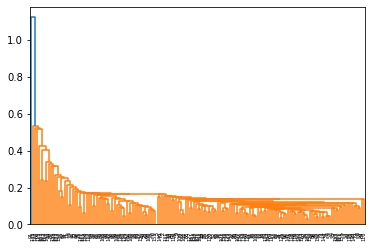

In [61]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure.
mergings = linkage(df1_scaled, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

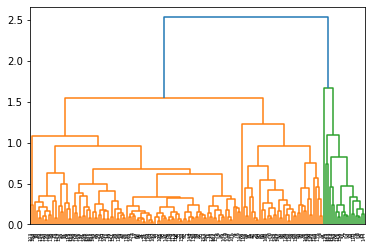

In [62]:
#We don't get good results here.
#Let's try complete linkage method
mergings = linkage(df1_scaled, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()